In [1]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def queens_fitness(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):
                fitness_cnt += 1

    return fitness_cnt

fitness_cust = mlrose.CustomFitness(queens_fitness)

schedule = mlrose.ArithDecay(init_temp=1,decay=0.01)

In [7]:
n_list = list(range(5,21))
bf_sa_list = []
bf_rhc_list = []
bf_ga_list = []
bf_mimic_list = []

for n in n_list:
    problem = mlrose.DiscreteOpt(length = n, fitness_fn = fitness_cust, maximize = True, max_val = n)
    
    init_state = list(range(n))
    
    best_state, best_fitness_sa = \
    mlrose.simulated_annealing(problem=problem, 
                           schedule=schedule,
                           max_attempts=100, 
                           init_state=init_state,
                           random_state=1,
                           curve=False)
    bf_sa_list.append(best_fitness_sa)
    
    best_state, best_fitness_rhc = \
    mlrose.random_hill_climb(problem=problem,
                            max_attempts=100,
                            curve=False,
                            random_state=1,
                            restarts=5)
    bf_rhc_list.append(best_fitness_rhc)
    
    best_state, best_fitness_ga = \
    mlrose.genetic_alg(problem=problem,
                            pop_size=100,
                            mutation_prob=0.1,
                            max_attempts=100,
                            curve=False,
                            random_state=1,
                            )
    bf_ga_list.append(best_fitness_ga)
    
    best_state, best_fitness_mimic = \
    mlrose.mimic(problem=problem,
                            pop_size=200,
                            keep_pct=0.1,
                            max_attempts=100,
                            curve=False,
                            random_state=1,
                            )
    bf_mimic_list.append(best_fitness_mimic)

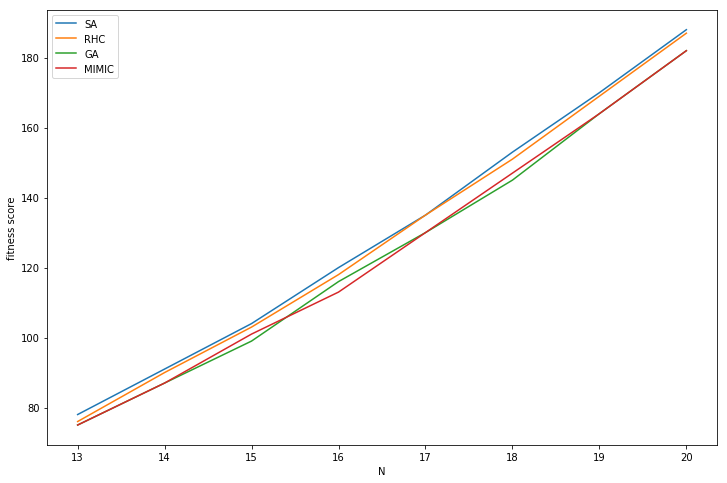

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
s = int(1*len(n_list)/2)
e = len(n_list)
plt.plot(n_list[s:e], bf_sa_list[s:e], label="SA")
plt.plot(n_list[s:e], bf_rhc_list[s:e], label='RHC')
plt.plot(n_list[s:e], bf_ga_list[s:e], label='GA')
plt.plot(n_list[s:e], bf_mimic_list[s:e], label='MIMIC')
plt.legend()
plt.xlabel('N')
plt.ylabel('fitness score')
plt.show()